In [1]:
# import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import copy
import hashlib
import cv2

#from PIL import Image

img = cv2.imread('cow.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 2 RGB
print(img.shape) # (H,W,C)
#print(img.size)
cropped = img[0:640, 170:810]

(640, 960, 3)


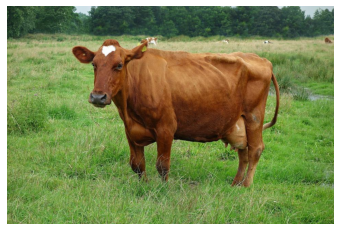

In [2]:
plt.imshow(img)
plt.axis('off')
plt.savefig('cow_ori.jpg')

In [3]:


def show_img(img, title='TEST'):
    plt.imshow(img)
    #cv2.waitKey(0)

    
def arnold(img, key):
    N, a, b, c, d = key  # a=1,b=1,c=1,d=2
    h, w = img.shape[: 2]
    new_img = copy.deepcopy(img)
    
    for i in range(N):
        
        for x in range(h):
            #print('---------x----------',x)
            for y in range(w):
                #print('-------------y------------',y)
                nx = (a * x + b * y) % w 
                ny = (c * x + d * y) % w 
                nx = int(nx)
                #print('-----------------nx-------------',nx)
                ny = int(ny)
                #print('-------------ny-------------',ny)
                new_img[nx, ny] = img[x, y]
                #print('original {0},{1} ==> {2},{3}'.format(x, y,nx,ny))
        img = copy.deepcopy(new_img)
    return new_img


def iarnold(img, key):
    N, a, b, c, d = key

    matrix = np.mat([[a, b], [c, d]]).I

    [[a, b], [c, d]] = matrix.tolist()
    return arnold(img, [N, a, b, c, d])

def iarnold_new(img, key):
    N, a, b, c, d = key

    #matrix = np.mat([[a, b], [c, d]]).I

    [[a, b], [c, d]] = [[(a*b+1),-a],[-b,1]]
    return arnold(img, [N, a, b, c, d])

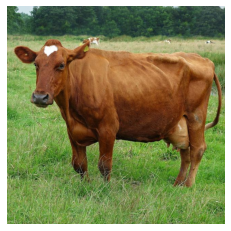

In [4]:
# show_img(cropped)
plt.imshow(cropped)
plt.axis('off')
plt.savefig('cow_ori.jpg')

In [5]:
import time 
start = time.time()
mew_img = arnold(cropped,[8, 1,1,1,2])
end = time.time()
total = end - start
#print('need {:.3f} sec'.format(total))

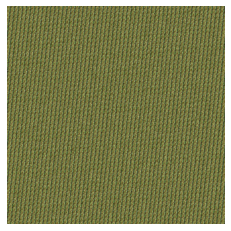

In [6]:
# show_img(mew_img)
plt.imshow(mew_img)
plt.axis('off')
plt.savefig('cow_acm.jpg')

In [9]:

start_i = time.time()
t_img = iarnold(mew_img,[8, 1,1,1,2])
end_i = time.time()
total_i = end_i - start_i
print('need {:.3f} second'.format(total_i))

need 5.193 second


In [12]:

start_i = time.time()
t_img = iarnold_new(mew_img,[8, 1,1,1,2])
end_i = time.time()
total_i = end_i - start_i
print('new need {:.3f} second'.format(total_i))

new need 3.627 second


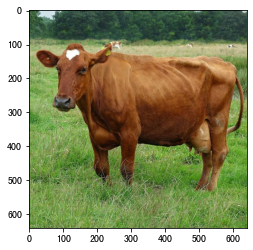

In [13]:
show_img(t_img)

In [14]:
# difference
np.count_nonzero(t_img-cropped)

0